# Student Performance Indicator

#####  Life cycle of machine learning project

   * Understanding the problem statement
   * Data Collection
   * Data Checks to perform
   * Exploratory data analysis
   * Data Pre-Processing
   * Model Training
   * Choose best model

### 1) Problem statement

  * This project understands how the student's performance(test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection

  * Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?satasetId=74977

  * The data consists of 8 column and 1000 rows

#### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

### Show Top 5 Records

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset

In [6]:
df.shape

(1000, 8)

### 2.1 Dataset information

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A,B,C,D,E)
* parental level of eduction : parents final eduction ->(bachelor's degree, associate's degree, high school)
* lunch : having lunch before test(standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score


### 3) Data checks to perform

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

### 3.1 Check Missing values

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### There are no missing values in the data set

### 3.2 Check Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

##### There are no duplicates values in the data set

### 3.3 Check data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of data set

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight

  * From above description of numerical data, all means are very close to each other - between 66 and 68.05
  * All standard deviations are also close - between 14.6 and 15.9
  * While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.6 Exploring Data

In [17]:
print("Categories in 'gender' variable:  ",end="")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end="")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:  ",end="")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:  ",end="")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:  ",end="")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


### 3.7 define numerical & categorical columns

In [18]:

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('We have {} numerical features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 numerical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [20]:
### 3.8 Adding columns for "Total Score" and "Average"
df['total score']= df['math score'] + df['reading score'] + df['writing score']
df['average']= df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Readings: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Readings: 17


In [23]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Readings: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Readings: 1


#### Insights
 * From above values we get students have performed the worst in Maths
 * Best performance is in reading section

### 4) Exploring Data (Visualization)

#### 4.1 Visualize average score distribution to make some conclusion.

  * Historgram
  * Kernel Distribution Function (KDE

##### 4.1.1 Histogram & KDE

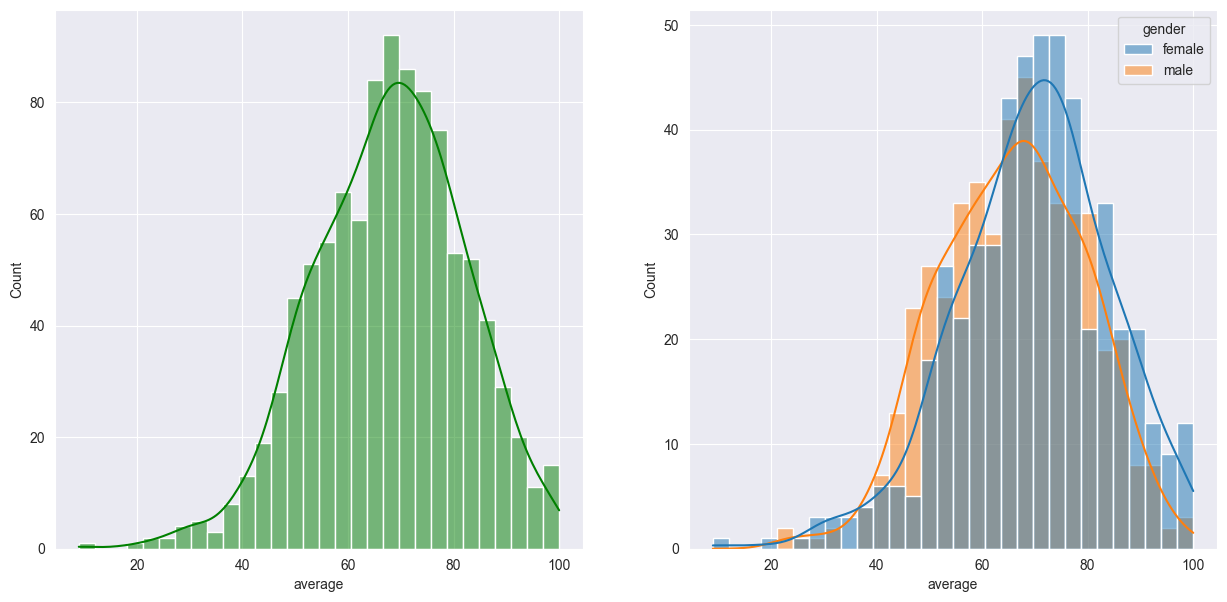

In [24]:
fig, axs = plt.subplots(1,  2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()

#### Insights
 * Female students tend to perform well then male students

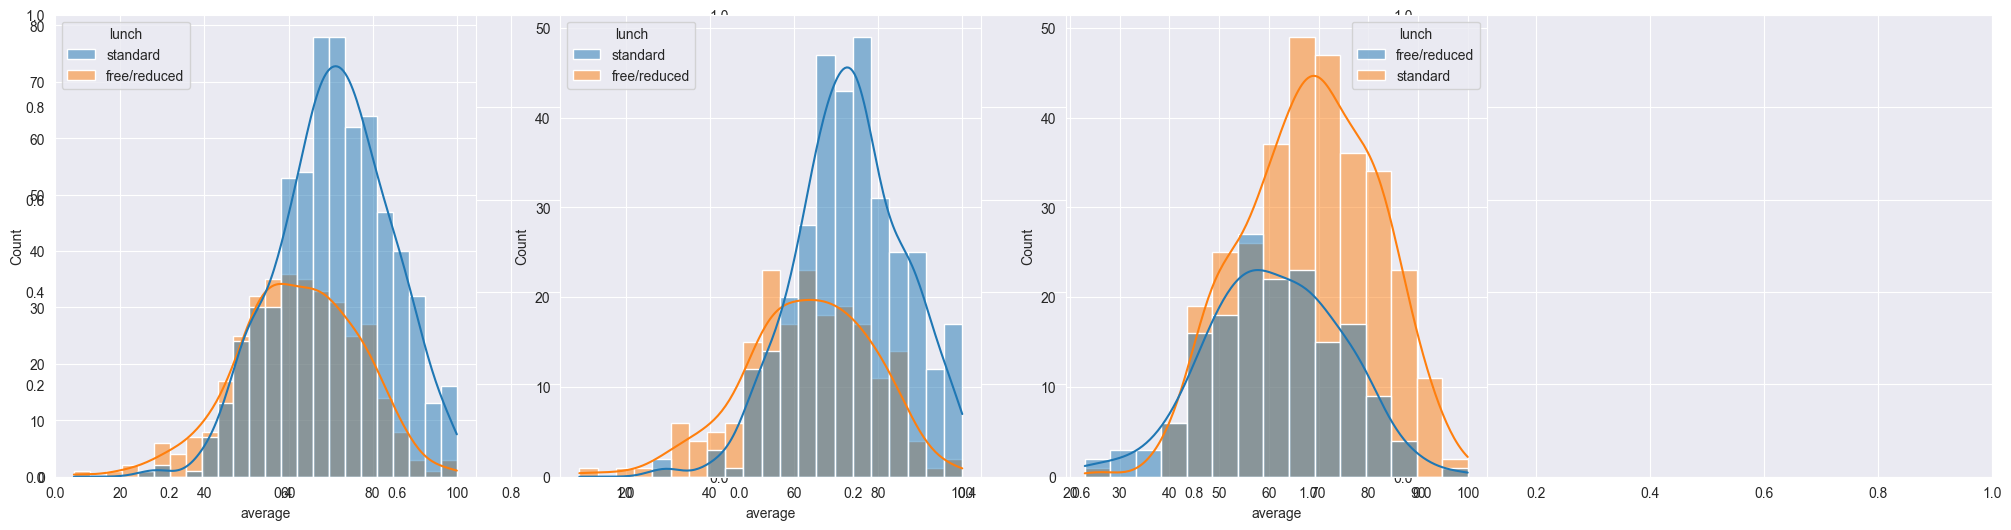

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

##### Insights

* Standard lunch helps perform well in exams
* Standard lunch helps perform well in exams be it a male or a female

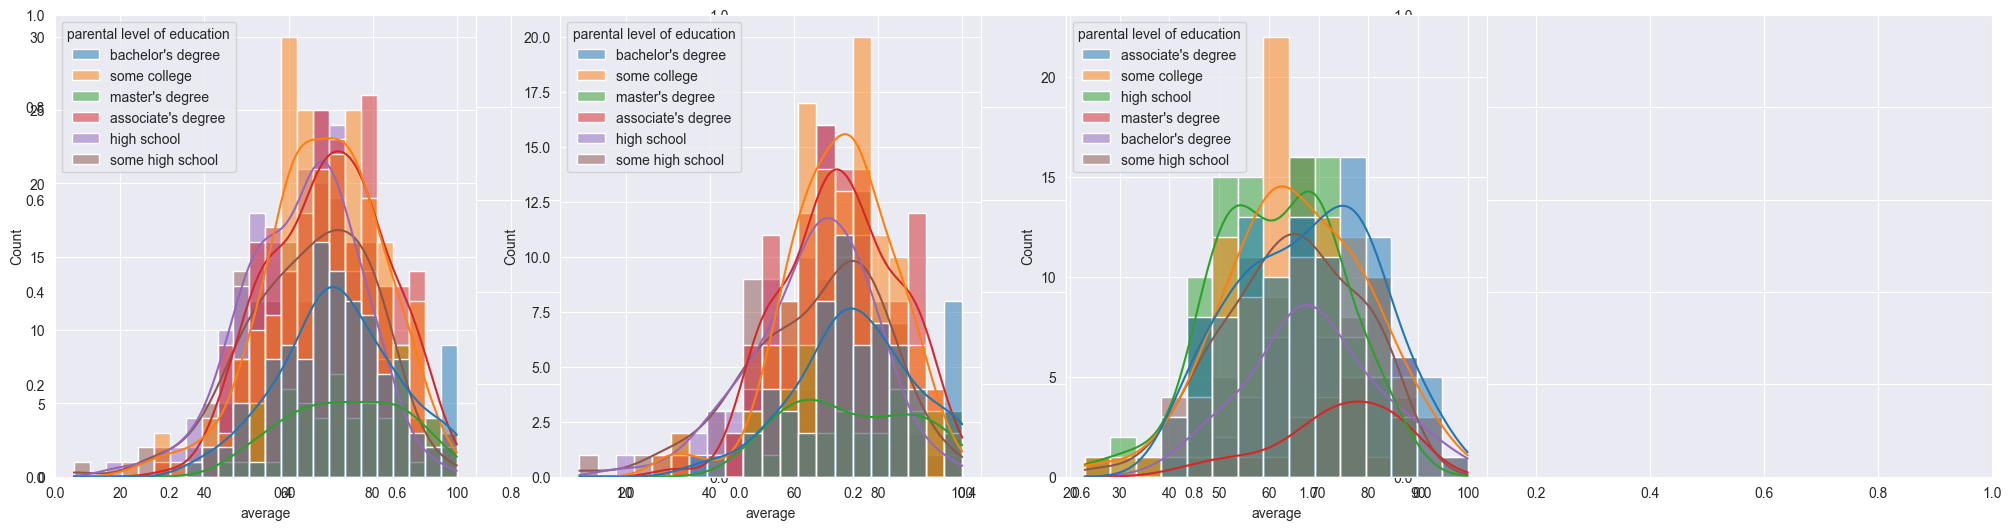

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.show()

#### Insights
* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.
* 3rd plot we can see there is no effect of parent's education on female students.

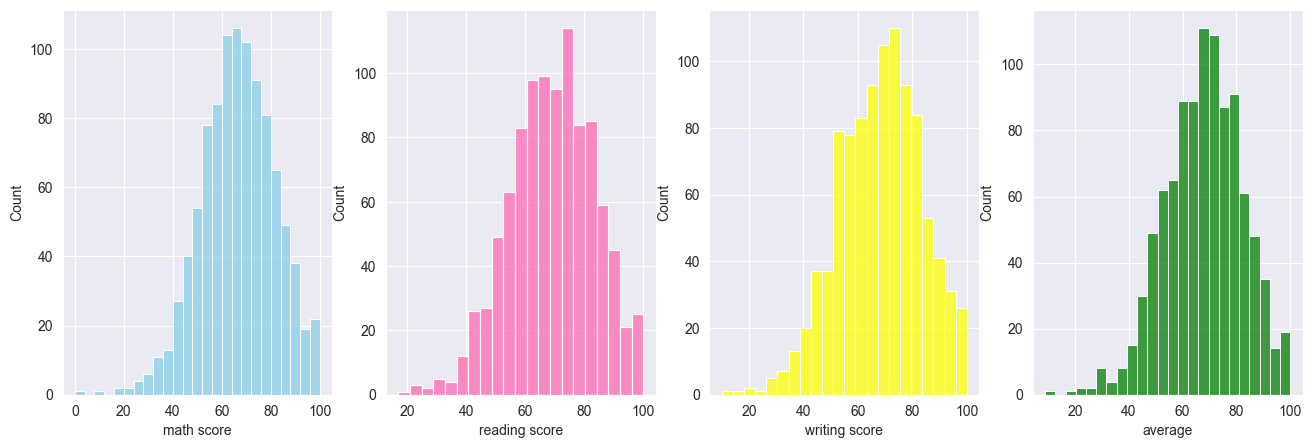

In [31]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.histplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.histplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.histplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.histplot(df['average'],color='green')
plt.show()

#### 4.4.7 Mutivariate analysis using pairplot

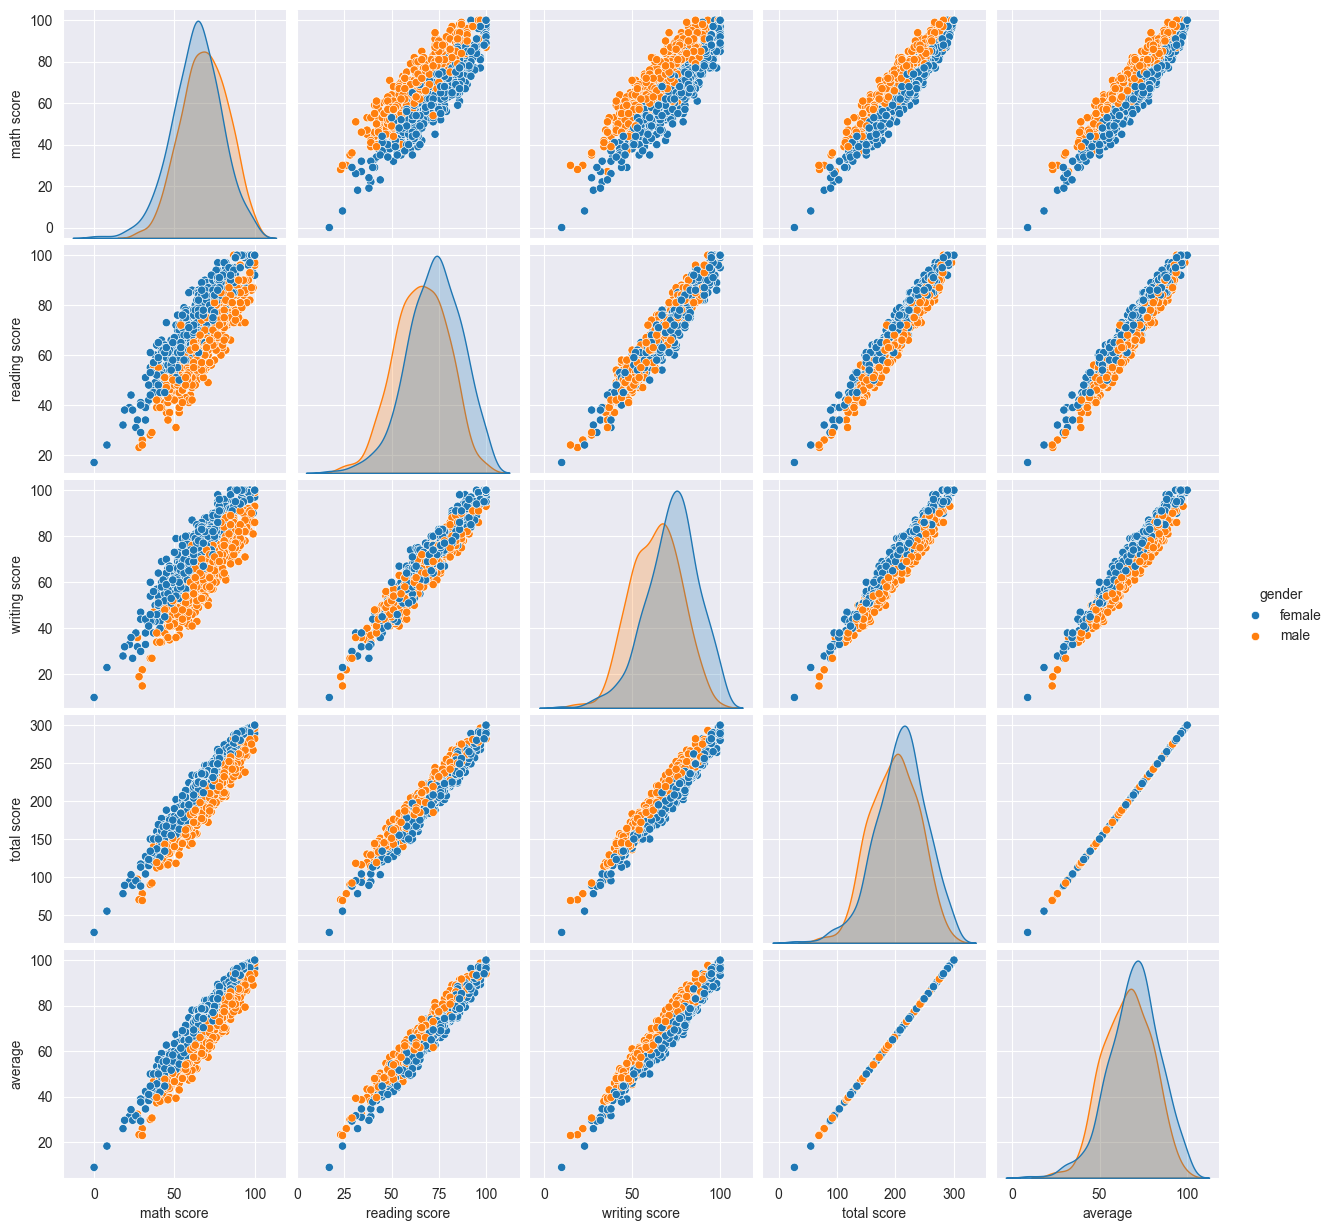

In [32]:
sns.pairplot(df,hue='gender')
plt.show()

### Insight
* From the above plot it is clear that all the scores increase linearly with each other.

### 5) Conclusions

* Student's performance is related with lunch, race, parental level of education
* Females lead in pass percentage and also are top-scorers
* Student's performance is not much related with test preparation course
* Finishing preparation course is benefitial